# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

## 先將資料轉置(feature per row)

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

## K-means 分群模型

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([670929.0681818182 320602.55 … 257377.4935897436 261326.34939759035; 862765.7329545454 161521.85 … 828634.2564102564 882186.530120482], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [7.33151035349585e9, 8.5127447147421875e9, 8.775560590144287e9, 4.72277875594165e9, 1.6187390657141113e10, 6.128515981958008e9, 4.887090264661133e9, 8.432457851249512e9, 2.841891040071289e9, 8.434160389880127e9  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [352, 340, 617, 322, 321, 102, 335, 321, 352, 365, 351, 656, 327, 156, 83], [352, 340, 617, 322, 321, 102, 335, 321, 352, 365, 351, 656, 327, 156, 83], 1.9911070209026297e13, 21, true)

## 取得分群

In [5]:
data[!, :cluster] = string.(assignments(result));

## 取得群中心

In [6]:
result.centers

2×15 Array{Float64,2}:
 670929.0  320603.0  612001.0  798634.0  …  852058.0  257377.0  261326.0
 862766.0  161522.0  483041.0  321485.0     157686.0  828634.0  882187.0

## 視覺化分群結果

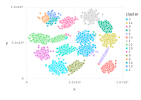

In [7]:
plot(data, x = "x", y = "y", color = "cluster", Geom.point)